# Claude Sonnet 3.5 V2 with v2.26 v2 prompt

This notebook outlines the steps undertook to generate a prediction using Claude Sonnet 3.5 V2 with prompt from 2/26/25 v2.

This prompt is built from combining the v2.17 and the v2.26 version to apply stricter rules and instructions on overrule vs not overrule.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from utils.new_pred_utils import predict
from utils.evaluate_predictions import show_metrics

from utils.instructions import claude_instructions_v502
MODEL_ID = "anthropic.claude-3-5-sonnet-20241022-v2:0"
SYSTEM_PROMPT = claude_instructions_v502

# Load the data

In [2]:
df = pd.read_csv("data/output_dataset.csv")
len(df)

1099

In [3]:
df.head()

,citing_cluster_id,citing_decision_name,citing_url,citing_opinions,citing_filenames,cited_cluster_id,cited_decision_name,cited_url,cited_name_short,cited_name,cited_name_full,cited_citations,overruled,note,use_full_opinion,filename
0,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88061,Texas v. White (1869),https://www.courtlistener.com/opinion/88061/te...,White,Texas v. White,Texas v. White Et Al.,"['74 U.S. 700', '19 L. Ed. 227', '7 Wall. 700'...",yes,NaN,0,0001.91306_cites_88061.txt
1,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88994,Vermilye & Co. v. Adams Express Co. (1875),https://www.courtlistener.com/opinion/88994/ve...,NaN,Vermilye & Co. v. Adams Express Co.,Vermilye & Co. v. Adams Express Company,"['88 U.S. 138', '22 L. Ed. 609', '21 Wall. 138...",no,NaN,0,0002.91306_cites_88994.txt
2,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],87633,Murray v. Lardner (1865),https://www.courtlistener.com/opinion/87633/mu...,Murray,Murray v. Lardner,Murray v. Lardner,"['69 U.S. 110', '17 L. Ed. 857', '2 Wall. 110'...",no,NaN,0,0003.91306_cites_87633.txt
3,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88240,Texas v. Hardenberg (1869),https://www.courtlistener.com/opinion/88240/te...,Hardenberg,Texas v. Hardenberg,Texas v. Hardenberg,"['77 U.S. 68', '19 L. Ed. 839', '10 Wall. 68',...",no,NaN,0,0004.91306_cites_88240.txt
4,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88693,Huntington v. Texas (1873),https://www.courtlistener.com/opinion/88693/hu...,Huntington,Huntington v. Texas,Huntington v. Texas; Texas v. Huntington,"['83 U.S. 402', '21 L. Ed. 316', '16 Wall. 402...",no,NaN,0,0005.91306_cites_88693.txt


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:root:Completed: 0
INFO:root:Completed: 1
INFO:root:Completed: 4
INFO:root:Completed: 3
INFO:root:Completed: 2
INFO:root:Completed: 7
INFO:root:Completed: 5
INFO:root:Completed: 6
INFO:root:Completed: 8
INFO:root:Completed: 9
INFO:root:Completed: 10
INFO:root:Completed: 12
INFO:root:Completed: 13
INFO:root:Completed: 11
INFO:root:Completed: 14
INFO:root:Completed: 15
INFO:root:Completed: 16
INFO:root:Completed: 17
INFO:root:Completed: 18
INFO:root:Completed: 19
INFO:root:Completed: 21
INFO:root:Completed: 20
INFO:root:Completed: 23
INFO:root:Completed: 22
INFO:root:Completed: 26
INFO:root:Completed: 25
INFO:root:Completed: 24
INFO:root:Completed: 27
INFO:root:Completed: 28
INFO:root:Completed: 30


CPU times: user 1min 9s, sys: 5.23 s, total: 1min 15s
Wall time: 25min 53s


[{'0001.91306_cites_88061.txt': {'model': 'anthropic.claude-3-5-sonnet-20241022-v2:0',
   'input_tokens': 6491,
   'output_tokens': 178,
   'prediction': 'yes',
   'quotes': 'The position there taken that the legislature of Texas, while the State was owner of the bonds, could limit their negotiability by an act of legislation, of which all subsequent purchasers were charged with notice, although the bonds on their face were payable to bearer, must be regarded as overruled.',
   'rationale': 'The Acting Decision explicitly overruled key aspects of Texas v. White. Specifically, it overruled the position that the legislature could limit the negotiability of bonds through legislation, and limited the holding regarding when government securities become overdue.',
   'instructions': 'Determine whether the Acting Decision overruled the Cited Decision.',
   'target_case': 'Texas v. White',
   'raw_results': '```json\n{\n  "instructions": "Determine whether the Acting Decision overruled the Cit

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,quotes,rationale,instructions,target_case,raw_results,user_message
0,0001.91306_cites_88061.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,6491,178,yes,The position there taken that the legislature ...,The Acting Decision explicitly overruled key a...,Determine whether the Acting Decision overrule...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth...","The Acting Decision name is: ""Morgan v. United..."
1,0002.91306_cites_88994.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,5745,201,no,We have not quoted the language from the opini...,The Acting Decision discusses and questions so...,Determine whether the Acting Decision overrule...,Vermilye & Co. v. Adams Express Co.,"```json\n{\n ""instructions"": ""Determine wheth...","The Acting Decision name is: ""Morgan v. United..."
2,0005.91306_cites_88693.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,3864,172,no,"The same questions, as to part of the same iss...",The passage merely discusses and cites Hunting...,Determine whether the Acting Decision overrule...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth...","The Acting Decision name is: ""Morgan v. United..."
3,0004.91306_cites_88240.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,5136,183,no,The case came before the court again in anothe...,The Acting Decision discusses Texas v. Hardenb...,Determine whether the Acting Decision overrule...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth...","The Acting Decision name is: ""Morgan v. United..."
4,0003.91306_cites_87633.txt,anthropic.claude-3-5-sonnet-20241022-v2:0,4591,221,no,"The rules established in Murray v. Lardner, 2 ...",The Acting Decision does not overrule Murray v...,Determine whether the Acting Decision overrule...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth...","The Acting Decision name is: ""Morgan v. United..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/1.sonnet3.5v2_predict.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

np.int64(2)

In [8]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/1.sonnet3.5v2_predict.csv")

In [9]:
prediction_df["prediction"].isna().sum()

np.int64(0)

# Combine the prediction results with label for evaluation

In [10]:
assert len(df) == len(prediction_df)

In [11]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,citing_cluster_id,citing_decision_name,citing_url,citing_opinions,citing_filenames,cited_cluster_id,cited_decision_name,cited_url,cited_name_short,cited_name,...,model,input_tokens,output_tokens,prediction,quotes,rationale,instructions,target_case,raw_results,user_message
0,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88061,Texas v. White (1869),https://www.courtlistener.com/opinion/88061/te...,White,Texas v. White,...,anthropic.claude-3-5-sonnet-20241022-v2:0,6491,178,yes,The position there taken that the legislature ...,The Acting Decision explicitly overruled key a...,Determine whether the Acting Decision overrule...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth...","The Acting Decision name is: ""Morgan v. United..."
1,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88994,Vermilye & Co. v. Adams Express Co. (1875),https://www.courtlistener.com/opinion/88994/ve...,NaN,Vermilye & Co. v. Adams Express Co.,...,anthropic.claude-3-5-sonnet-20241022-v2:0,5745,201,no,We have not quoted the language from the opini...,The Acting Decision discusses and questions so...,Determine whether the Acting Decision overrule...,Vermilye & Co. v. Adams Express Co.,"```json\n{\n ""instructions"": ""Determine wheth...","The Acting Decision name is: ""Morgan v. United..."
2,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],87633,Murray v. Lardner (1865),https://www.courtlistener.com/opinion/87633/mu...,Murray,Murray v. Lardner,...,anthropic.claude-3-5-sonnet-20241022-v2:0,4591,221,no,"The rules established in Murray v. Lardner, 2 ...",The Acting Decision does not overrule Murray v...,Determine whether the Acting Decision overrule...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth...","The Acting Decision name is: ""Morgan v. United..."
3,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88240,Texas v. Hardenberg (1869),https://www.courtlistener.com/opinion/88240/te...,Hardenberg,Texas v. Hardenberg,...,anthropic.claude-3-5-sonnet-20241022-v2:0,5136,183,no,The case came before the court again in anothe...,The Acting Decision discusses Texas v. Hardenb...,Determine whether the Acting Decision overrule...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth...","The Acting Decision name is: ""Morgan v. United..."
4,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88693,Huntington v. Texas (1873),https://www.courtlistener.com/opinion/88693/hu...,Huntington,Huntington v. Texas,...,anthropic.claude-3-5-sonnet-20241022-v2:0,3864,172,no,"The same questions, as to part of the same iss...",The passage merely discusses and cites Hunting...,Determine whether the Acting Decision overrule...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth...","The Acting Decision name is: ""Morgan v. United..."


# Run evaluation

In [12]:
df["overruled"].value_counts()

overruled
no     938
yes    161
Name: count, dtype: int64

In [13]:
eval_df["overruled"].value_counts()

overruled
no     938
yes    161
Name: count, dtype: int64

In [14]:
eval_df["prediction"].value_counts()

prediction
no     906
yes    193
Name: count, dtype: int64

In [15]:
eval_df["input_tokens"].sum()

np.int64(7081357)

In [16]:
eval_df["output_tokens"].sum()

np.int64(233751)

In [17]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [18]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.98      0.95      0.97       938
         Yes       0.76      0.91      0.82       161

    accuracy                           0.94      1099
   macro avg       0.87      0.93      0.90      1099
weighted avg       0.95      0.94      0.95      1099



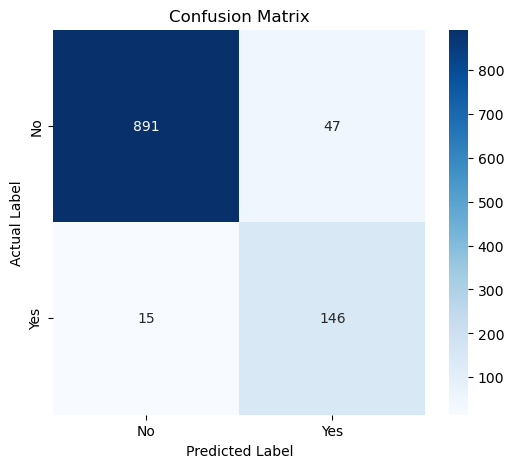

In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.94
Precision: 0.76
Recall: 0.91
F-score: 0.82
Specificity: 0.95
---------
DATASET
Total Responses: 1099
Total Positives: 161
Total Negatives: 938
---------
RECOUNT
True positives: 146
True negatives: 891
False positives: 47
False negatives: 15


# Save the evaluation df

In [21]:
eval_df.head()

,citing_cluster_id,citing_decision_name,citing_url,citing_opinions,citing_filenames,cited_cluster_id,cited_decision_name,cited_url,cited_name_short,cited_name,...,model,input_tokens,output_tokens,prediction,quotes,rationale,instructions,target_case,raw_results,user_message
0,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88061,Texas v. White (1869),https://www.courtlistener.com/opinion/88061/te...,White,Texas v. White,...,anthropic.claude-3-5-sonnet-20241022-v2:0,6491,178,yes,The position there taken that the legislature ...,The Acting Decision explicitly overruled key a...,Determine whether the Acting Decision overrule...,Texas v. White,"```json\n{\n ""instructions"": ""Determine wheth...","The Acting Decision name is: ""Morgan v. United..."
1,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88994,Vermilye & Co. v. Adams Express Co. (1875),https://www.courtlistener.com/opinion/88994/ve...,NaN,Vermilye & Co. v. Adams Express Co.,...,anthropic.claude-3-5-sonnet-20241022-v2:0,5745,201,no,We have not quoted the language from the opini...,The Acting Decision discusses and questions so...,Determine whether the Acting Decision overrule...,Vermilye & Co. v. Adams Express Co.,"```json\n{\n ""instructions"": ""Determine wheth...","The Acting Decision name is: ""Morgan v. United..."
2,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],87633,Murray v. Lardner (1865),https://www.courtlistener.com/opinion/87633/mu...,Murray,Murray v. Lardner,...,anthropic.claude-3-5-sonnet-20241022-v2:0,4591,221,no,"The rules established in Murray v. Lardner, 2 ...",The Acting Decision does not overrule Murray v...,Determine whether the Acting Decision overrule...,Murray v. Lardner,"```json\n{\n ""instructions"": ""Determine wheth...","The Acting Decision name is: ""Morgan v. United..."
3,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88240,Texas v. Hardenberg (1869),https://www.courtlistener.com/opinion/88240/te...,Hardenberg,Texas v. Hardenberg,...,anthropic.claude-3-5-sonnet-20241022-v2:0,5136,183,no,The case came before the court again in anothe...,The Acting Decision discusses Texas v. Hardenb...,Determine whether the Acting Decision overrule...,Texas v. Hardenberg,"```json\n{\n ""instructions"": ""Determine wheth...","The Acting Decision name is: ""Morgan v. United..."
4,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88693,Huntington v. Texas (1873),https://www.courtlistener.com/opinion/88693/hu...,Huntington,Huntington v. Texas,...,anthropic.claude-3-5-sonnet-20241022-v2:0,3864,172,no,"The same questions, as to part of the same iss...",The passage merely discusses and cites Hunting...,Determine whether the Acting Decision overrule...,Huntington v. Texas,"```json\n{\n ""instructions"": ""Determine wheth...","The Acting Decision name is: ""Morgan v. United..."


In [22]:
eval_df.to_csv("predictions/1.sonnet3.5v2_predict_eval.csv", index=False)